# Greek Sensitivities via Central Finite Differences 

In this notebook, we compute key sensitivities (Greeks) for European options using the **central finite difference** method. These Greeks help us measure how sensitive the option price is to various parameters:
- **Delta**: sensitivity to the underlying asset price (S)
- **Gamma**: second-order sensitivity to the asset price
- **Vega**: sensitivity to volatility (σ)

We use our previously implemented Black-Scholes model as the base pricing engine.

| Symbol | Meaning          | Value       |
|:------:|------------------|:-----------:|
| \(S_0\) | Spot price       | 100         |
| \(K\)   | Strike           | 100         |
| \(r\)   | Risk-free rate   | 5 %         |
| $(\sigma)$ | Volatility    | 20 %        |
| \(T\)   | Time to maturity | 1.0 yr      |
| \(h\)   | Bump size        | 0.01        |

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys

# Allow imports from pricing package
sys.path.append(os.path.abspath("../../"))

from pricing.bsm import bsm_price

In [2]:
# Finite Difference Greek Engine


def compute_greeks(S0, K, T, r, sigma, is_call=True, h=1e-2):
    # Delta
    up = bsm_price(S0 + h, K, r, sigma, T, is_call)
    down = bsm_price(S0 - h, K, r, sigma, T, is_call)
    delta = (up - down) / (2 * h)

    # Gamma
    mid = bsm_price(S0, K, r, sigma, T, is_call)
    gamma = (up - 2 * mid + down) / (h**2)

    # Vega
    vup = bsm_price(S0, K, r, sigma + h, T, is_call)
    vdown = bsm_price(S0, K, r, sigma - h, T, is_call)
    vega = (vup - vdown) / (2 * h)

    return delta, gamma, vega

In [3]:
# Parameters
S0 = 100
K = 100
T = 1.0
r = 0.05
sigma = 0.2
option_type = "call"

# Compute at–the–money Greeks
delta0, gamma0, vega0 = compute_greeks(S0, K, T, r, sigma, "call", h=1e-2)

print(f"Delta (at S0={S0}): {delta0:.4f}")
print(f"Gamma (at S0={S0}): {gamma0:.4f}")
print(f"Vega  (at σ={sigma}): {vega0 :.4f}")

Delta (at S0=100): 0.6368
Gamma (at S0=100): 0.0188
Vega  (at σ=0.2): 37.5210


### Observations:
- **Delta** is positive for call options and increases with S.
- **Gamma** is highest near-the-money and decreases away from the strike.
- **Vega** shows the sensitivity of price to small changes in volatility and is also highest near-the-money.

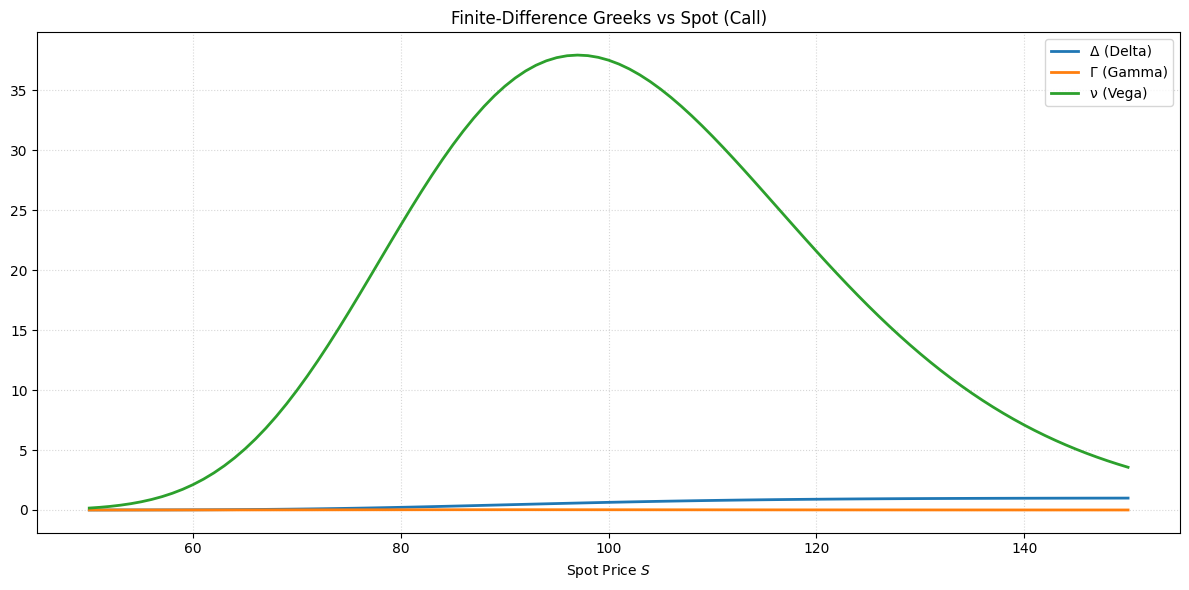

In [4]:
# Spot grid
S_range = np.linspace(50, 150, 101)

# Allocate
deltas = []
gammas = []
vegas = []
for S in S_range:
    d, g, v = compute_greeks(S, K, T, r, sigma, "call", h=1e-2)
    deltas.append(d)
    gammas.append(g)
    vegas.append(v)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(S_range, deltas, label="Δ (Delta)", lw=2)
plt.plot(S_range, gammas, label="Γ (Gamma)", lw=2)
plt.plot(S_range, vegas, label="ν (Vega)", lw=2)
plt.xlabel("Spot Price $S$")
plt.title("Finite-Difference Greeks vs Spot (Call)")
plt.legend()
plt.grid(ls=":", alpha=0.5)
plt.tight_layout()
plt.show()

### Observations
- **Delta** increases monotonically from 0 toward 1 as \(S\) rises above \(K\).  
- **Gamma** peaks near-the-money (\(S\approx K\)) and decays away from the strike.  
- **Vega** is largest around \(S=K\), reflecting volatility sensitivity for ATM options.

---

### Summary
We applied central finite differences to the BSM formula and demonstrated that:
1. Delta is positive and bounded between 0 and 1 for calls.  
2. Gamma’s bell shape confirms greatest curvature at ATM.  
3. Vega highlights the maximum volatility sensitivity at the money.  
This engine can be repurposed for the PDE and Monte Carlo notebooks in the Greek-sensitivity folder.